In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import pickle
import warnings

warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv(r"C:\Users\divya\OneDrive\Desktop\Campus Placement Predictor\Data\collegePlace.csv")

In [97]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
import numpy as np

In [100]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [101]:
df.isnull()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


In [102]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [103]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [104]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [105]:
df['Age'].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29])

In [106]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [107]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [108]:
df['CGPA'].unique()

array([8, 7, 6, 9, 5])

In [109]:
df['Hostel'].unique()

array([1, 0])

In [110]:
df['HistoryOfBacklogs'].unique()

array([1, 0])

In [111]:
df['PlacedOrNot'].unique()

array([1, 0])

In [112]:
df['PlacedOrNot'].value_counts()

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64

In [113]:
print("The Number Of Students Placed : ", df['PlacedOrNot'].value_counts()[1])
print("The Number Of Students Not Placed : ", df['PlacedOrNot'].value_counts()[0])

The Number Of Students Placed :  1639
The Number Of Students Not Placed :  1327


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

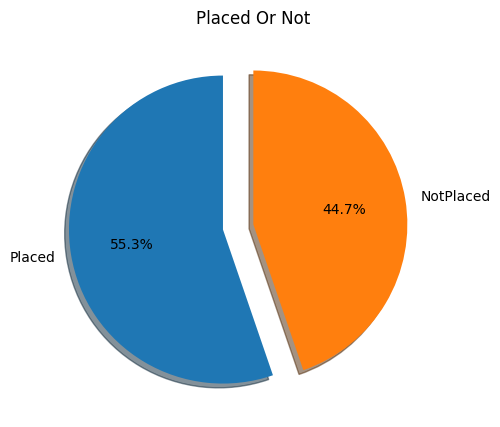

In [115]:
plt.figure(figsize = (10,5))
plt.pie(df['PlacedOrNot'].value_counts(), labels =['Placed','NotPlaced'], autopct = '%.1f%%',explode = [0.2 , 0] , shadow = True ,startangle = 90 )
plt.title("Placed Or Not")
plt.show()

In [116]:
Max = df[(df['Age'] == df['Age'].max()) & (df['PlacedOrNot'] == 1)]['Age'].values[0]
print("Max Age Of Placed Person : ", Max)

Min = df[(df['Age'] == df['Age'].min()) & (df['PlacedOrNot'] == 0)]['Age'].values[0]
print("Min Age Of Placed Person : ", Min)

Max Age Of Placed Person :  30
Min Age Of Placed Person :  19


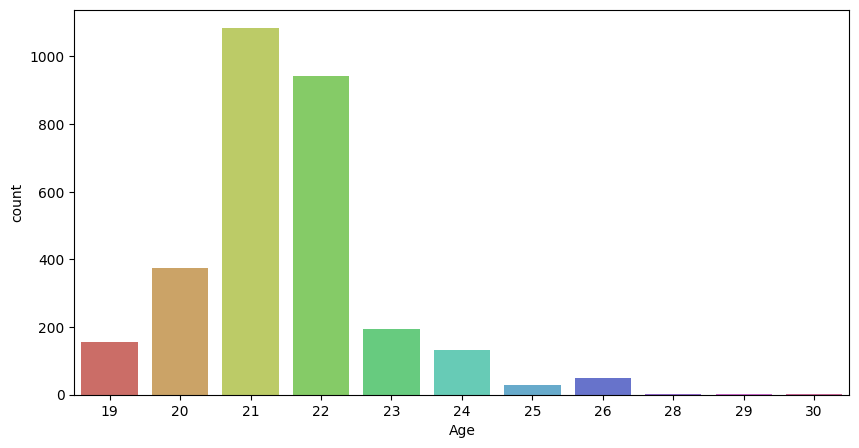

In [117]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data = df, palette = 'hls') 
plt.show()

In [118]:
M = df[df['Gender'] == 'Male']['Gender'].count()

print("Total Number Of Male Student : ",M)

Total Number Of Male Student :  2475


In [119]:
M_P = df[(df['Gender'] == 'Male') & (df['PlacedOrNot'] == 1)]['PlacedOrNot'].count()

print("Total Number Of Male Student Who Got Placed : ",M_P)
print("Number Of Male Student Who Are Not Placed : ", M - M_P)

Total Number Of Male Student Who Got Placed :  1364
Number Of Male Student Who Are Not Placed :  1111


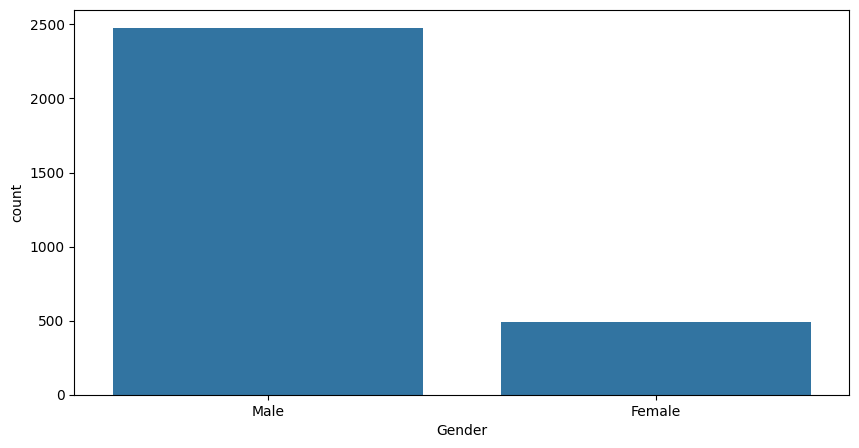

In [120]:
plt.figure(figsize = (10,5))
sns.countplot(x='Gender', data=df)
plt.show()

In [121]:
F = df[df['Gender'] == 'Female']['Gender'].count()

print("Total Number Of Female Student : ",F)

Total Number Of Female Student :  491


In [122]:
M_F = df[(df['Gender'] == 'Female') & (df['PlacedOrNot'] == 1)]['PlacedOrNot'].count()

print("Total Number Of Female Student Who Got Placed : ",M_F)
print("Number Of Female Student Who Are Not Placed : ", F - M_F)

Total Number Of Female Student Who Got Placed :  275
Number Of Female Student Who Are Not Placed :  216


In [123]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [124]:
ec = df[df['Stream'] == 'Electronics And Communication'].shape[0]

print("Total Number Of Students In Electronics And Communication : ", ec)

Total Number Of Students In Electronics And Communication :  424


In [125]:
placed = df[(df['Stream'] == 'Electronics And Communication') & (df['PlacedOrNot'] == 1)].shape[0]

print("Electronics And Communication Students Who Got Placement : " , placed)

Electronics And Communication Students Who Got Placement :  251


In [126]:
n_placed = df[(df['Stream'] == 'Electronics And Communication') & (df['PlacedOrNot'] == 0)].shape[0]

print("Electronics And Communication Students Who Are Not Placed : " , n_placed)

Electronics And Communication Students Who Are Not Placed :  173


In [127]:
cs = df[df['Stream'] == 'Computer Science'].shape[0]

print("Total Number Of Students In Computer Science : ", cs)

Total Number Of Students In Computer Science :  776


In [128]:
placed = df[(df['Stream'] == 'Computer Science') & (df['PlacedOrNot'] == 1)].shape[0]

print("Computer Science Students Who Got Placement : " , placed)

n_placed = df[(df['Stream'] == 'Computer Science') & (df['PlacedOrNot'] == 0)].shape[0]

print("Computer Science Students Who Are Not Placed : " , n_placed)

Computer Science Students Who Got Placement :  452
Computer Science Students Who Are Not Placed :  324


In [129]:
it = df[df['Stream'] == 'Information Technology'].shape[0]

print("Total Number Of Students In Information Technology : ",it)

placed = df[(df['Stream'] == 'Information Technology') & (df['PlacedOrNot'] == 1)].shape[0]

print("Information Technology Students Who Got Placement : " , placed)

n_placed = df[(df['Stream'] == 'Information Technology') & (df['PlacedOrNot'] == 0)].shape[0]

print("Information Technology Students Who Are Not Placed : " , n_placed)

Total Number Of Students In Information Technology :  691
Information Technology Students Who Got Placement :  409
Information Technology Students Who Are Not Placed :  282


In [130]:
mc = df[df['Stream'] == 'Mechanical'].shape[0]

print("Total Number Of Students In Mechanical : ",mc)

placed = df[(df['Stream'] == 'Mechanical') & (df['PlacedOrNot'] == 1)].shape[0]

print("Mechanical Students Who Got Placement : " , placed)

n_placed = df[(df['Stream'] == 'Mechanical') & (df['PlacedOrNot'] == 0)].shape[0]

print("Mechanical Students Who Are Not Placed : " , n_placed)

Total Number Of Students In Mechanical :  424
Mechanical Students Who Got Placement :  200
Mechanical Students Who Are Not Placed :  224


In [131]:
el = df[df['Stream'] == 'Electrical'].shape[0]

print("Total Number Of Students In Electrical : ",el)

placed = df[(df['Stream'] == 'Electrical') & (df['PlacedOrNot'] == 1)].shape[0]

print("Electrical Students Who Got Placement : " , placed)

n_placed = df[(df['Stream'] == 'Electrical') & (df['PlacedOrNot'] == 0)].shape[0]

print("Electrical Students Who Are Not Placed : " , n_placed)

Total Number Of Students In Electrical :  334
Electrical Students Who Got Placement :  181
Electrical Students Who Are Not Placed :  153


In [132]:
cv = df[df['Stream'] == 'Civil'].shape[0]

print("Total Number Of Students In Civil : ",cv)

placed = df[(df['Stream'] == 'Civil') & (df['PlacedOrNot'] == 1)].shape[0]

print("Civil Students Who Got Placement : " , placed)

n_placed = df[(df['Stream'] == 'Civil') & (df['PlacedOrNot'] == 0)].shape[0]

print("Civil Students Who Are Not Placed : " , n_placed)

Total Number Of Students In Civil :  317
Civil Students Who Got Placement :  146
Civil Students Who Are Not Placed :  171


In [133]:
cv + ec + it + el + cs + mc

2966

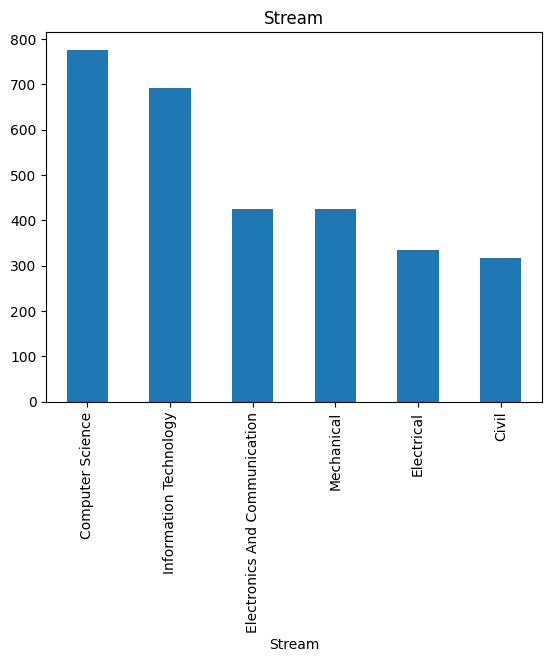

<Figure size 1000x500 with 0 Axes>

In [134]:
fig = df ['Stream'].value_counts().plot.bar()
plt.figure(figsize = (10,5))
fig.set_title('Stream')
plt.show()

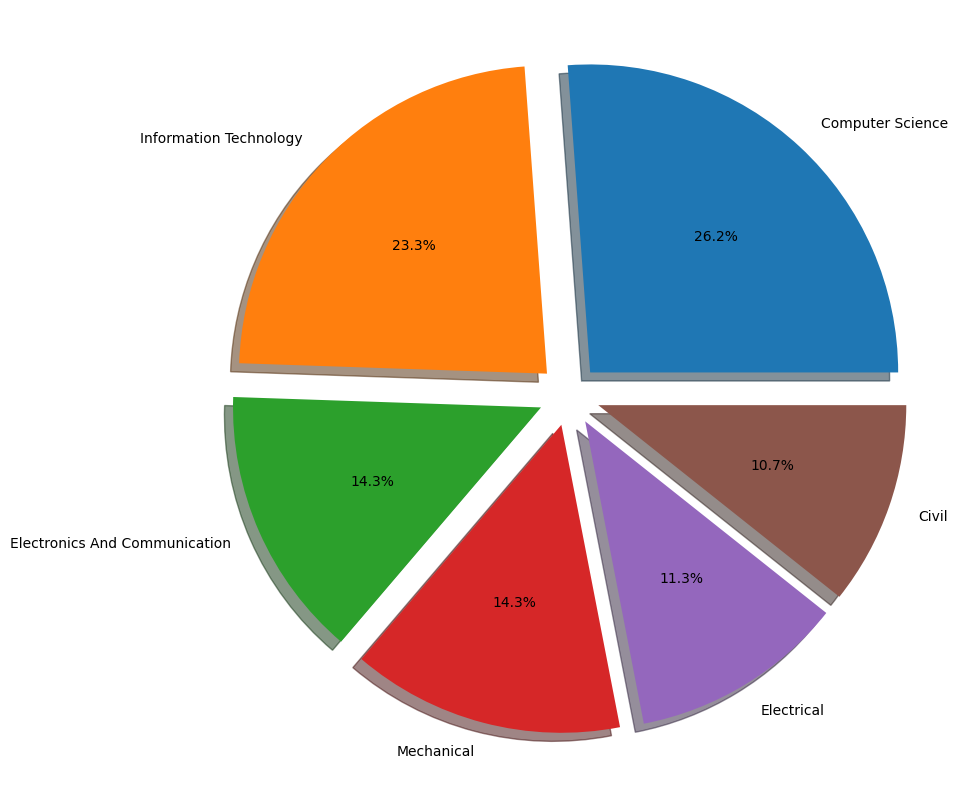

In [135]:
plt.figure(figsize = (10,10))
plt.pie(df['Stream'].value_counts(), labels = df['Stream'].value_counts().index, autopct = '%.1f%%', explode = [0.1,0.1,0.1,0.1,0.1,0.1] , shadow = True)
plt.show()

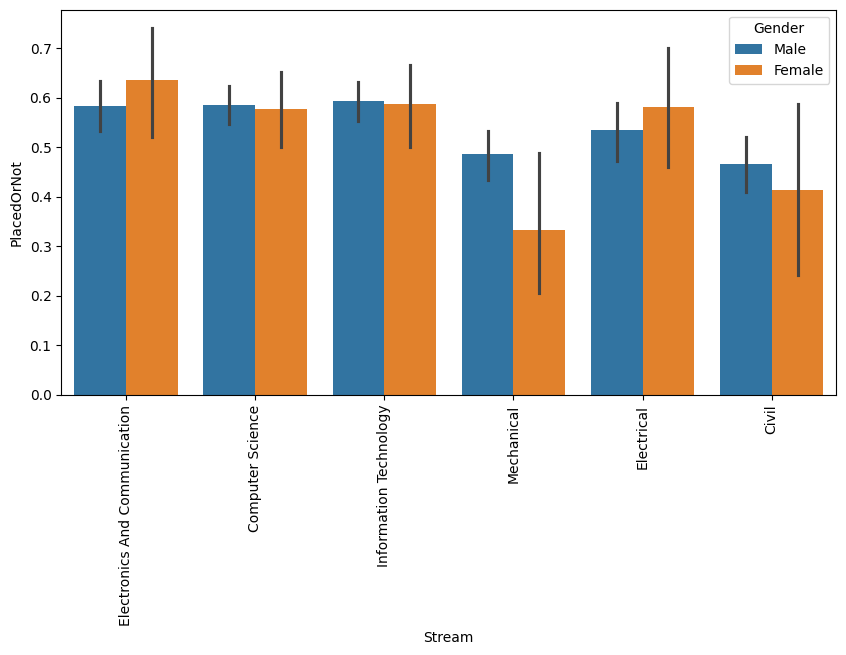

In [136]:
plt.figure(figsize = (10,5))
sns.barplot(data=df, x="Stream", y="PlacedOrNot",hue ="Gender").set_xticklabels(labels = df['Stream'].unique(),rotation = 90)
plt.show()

In [137]:
Max_In = df[(df['Internships'] == df['Internships'].max()) 
          & (df['PlacedOrNot'] == 1)]['Internships'].values[0]

print("Max Internships Done By The Placed Student : ", Max_In)

Max_In_Pl = df[(df['Internships'] == df['Internships'].max()) 
             & (df['PlacedOrNot'] == 1)]['Internships'].value_counts().values[0]

print("No. Of Student Who Did Max Internships And Are Placed : " , Max_In_Pl)

Max Internships Done By The Placed Student :  3
No. Of Student Who Did Max Internships And Are Placed :  41


In [138]:
Min_In = df[(df['Internships'] == df['Internships'].min()) 
          & (df['PlacedOrNot'] == 1)]['Internships'].values[0]

print("Min Internships Done By The Placed Student : ", Min_In)

Min_In_Pl = df[(df['Internships'] == df['Internships'].min()) 
             & (df['PlacedOrNot'] == 1)]['Internships'].value_counts().values[0]

print("No. Of Student Who Did Min Internships And Are Placed : " , Min_In_Pl)

Min Internships Done By The Placed Student :  0
No. Of Student Who Did Min Internships And Are Placed :  654


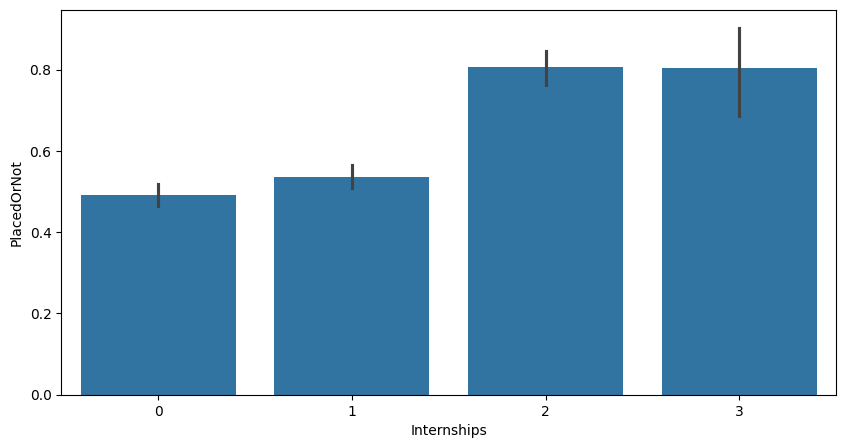

In [139]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.Internships, y = df.PlacedOrNot) 
plt.show()

In [140]:
Max_C = df[(df['CGPA'] == df['CGPA'].max()) 
          & (df['PlacedOrNot'] == 1)]['CGPA'].values[0]

print("Max CGPA Obtained By The Placed Student : ", Max_C)

Max_C_Pl = df[(df['CGPA'] == df['CGPA'].max()) 
             & (df['PlacedOrNot'] == 1)]['CGPA'].value_counts().values[0]

print("No. Of Student Who Has Max CGPA And Are Placed : " , Max_C_Pl)

Max CGPA Obtained By The Placed Student :  9
No. Of Student Who Has Max CGPA And Are Placed :  165


In [141]:
Min_C = df[(df['CGPA'] == df['CGPA'].min()) 
          & (df['PlacedOrNot'] == 1)]['CGPA'].values[0]

print("Min CGPA Obtained By The Placed Student : ", Min_C)

Min_C_Pl = df[(df['CGPA'] == df['CGPA'].min()) 
             & (df['PlacedOrNot'] == 1)]['CGPA'].value_counts().values[0]

print("No. Of Student Who Has Min CGPA And Are Placed : " , Min_C_Pl)

Min CGPA Obtained By The Placed Student :  5
No. Of Student Who Has Min CGPA And Are Placed :  7


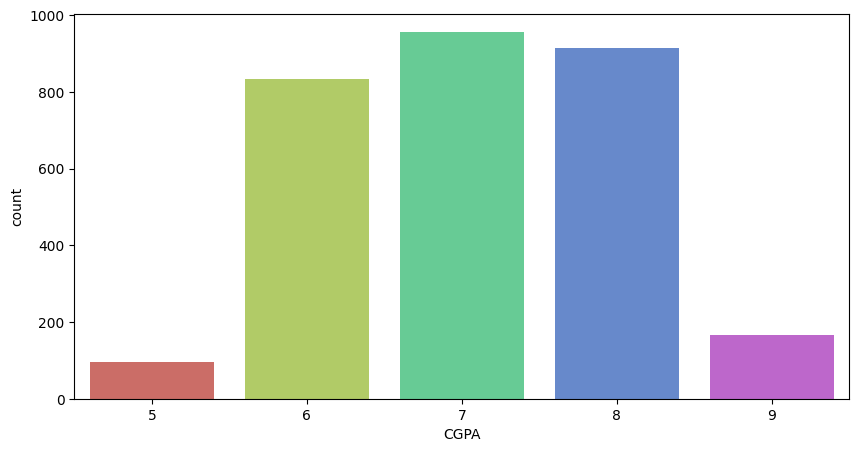

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(x='CGPA', data = df, palette = 'hls') 
plt.show()

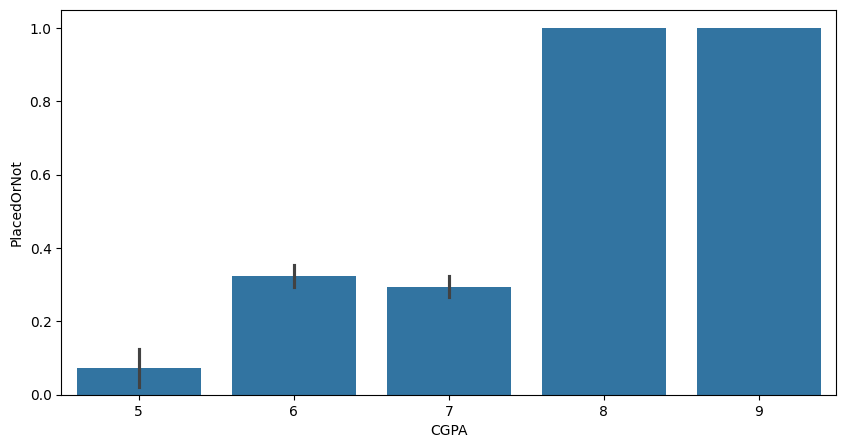

In [143]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.CGPA, y = df.PlacedOrNot) 
plt.show()

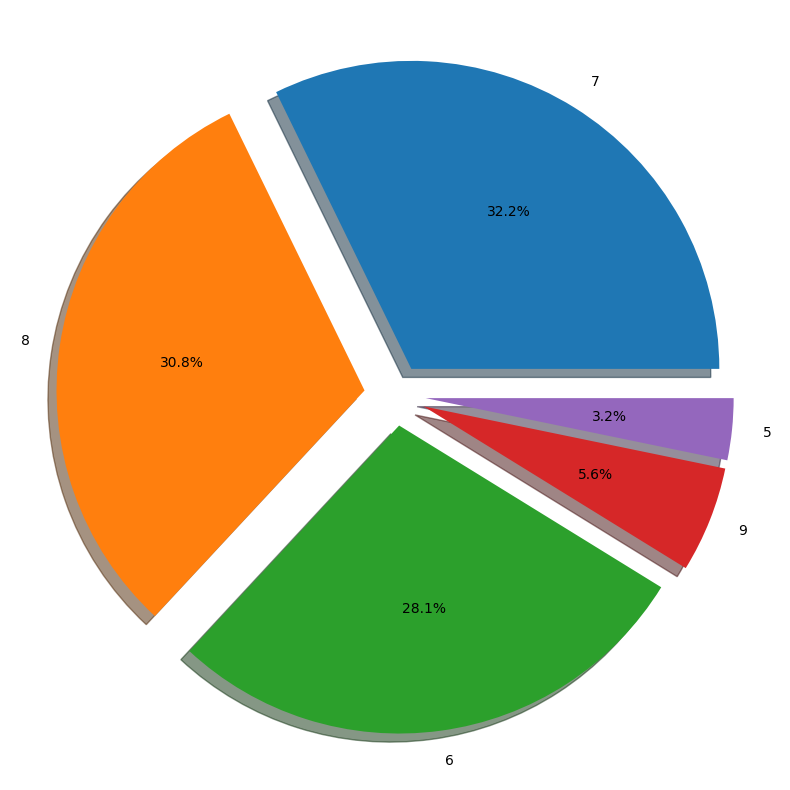

In [144]:
plt.figure(figsize = (10,10))
plt.pie(df['CGPA'].value_counts(),labels = df['CGPA'].value_counts().index,autopct = '%.1f%%',explode =[0.1,0.1,0.1,0.1,0.1],shadow = True)
plt.show()

In [145]:
H = df[df['Hostel'] == 1].shape[0]

print("Number Of Student Who Live In Hostel : ", H)
print("Number Of Student Who Don't Live In Hostel" , df[df['Hostel'] == 0].shape[0])

Number Of Student Who Live In Hostel :  798
Number Of Student Who Don't Live In Hostel 2168


In [146]:
H_P = df[(df['Hostel'] == 1) & df['PlacedOrNot'] == 1].shape[0]

print("Number Of Student Who Live In Hostel And Got Placed : ", H_P)

Number Of Student Who Live In Hostel And Got Placed :  416


In [147]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [148]:
df['Gender'].map({'Male' : 1 , 'Female' : 0})

0       1
1       0
2       0
3       1
4       1
       ..
2961    1
2962    1
2963    1
2964    1
2965    1
Name: Gender, Length: 2966, dtype: int64

In [149]:
df['Gender'] = df['Gender'].map({'Male' : 1 , 'Female' : 0})

In [150]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


In [151]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [152]:
df['Stream'].map({'Electronics And Communication' : 1,
                  'Computer Science' : 2,
                  'Information Technology' : 3,
                  'Mechanical' : 4,
                  'Electrical' : 5,
                  'Civil' : 6
                 })

0       1
1       2
2       3
3       3
4       4
       ..
2961    3
2962    4
2963    3
2964    2
2965    6
Name: Stream, Length: 2966, dtype: int64

In [153]:
df['Stream'] = df['Stream'].map({'Electronics And Communication' : 1,
                  'Computer Science' : 2,
                  'Information Technology' : 3,
                  'Mechanical' : 4,
                  'Electrical' : 5,
                  'Civil' : 6
                 })

In [154]:
df.dtypes

Age                  int64
Gender               int64
Stream               int64
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64
dtype: object

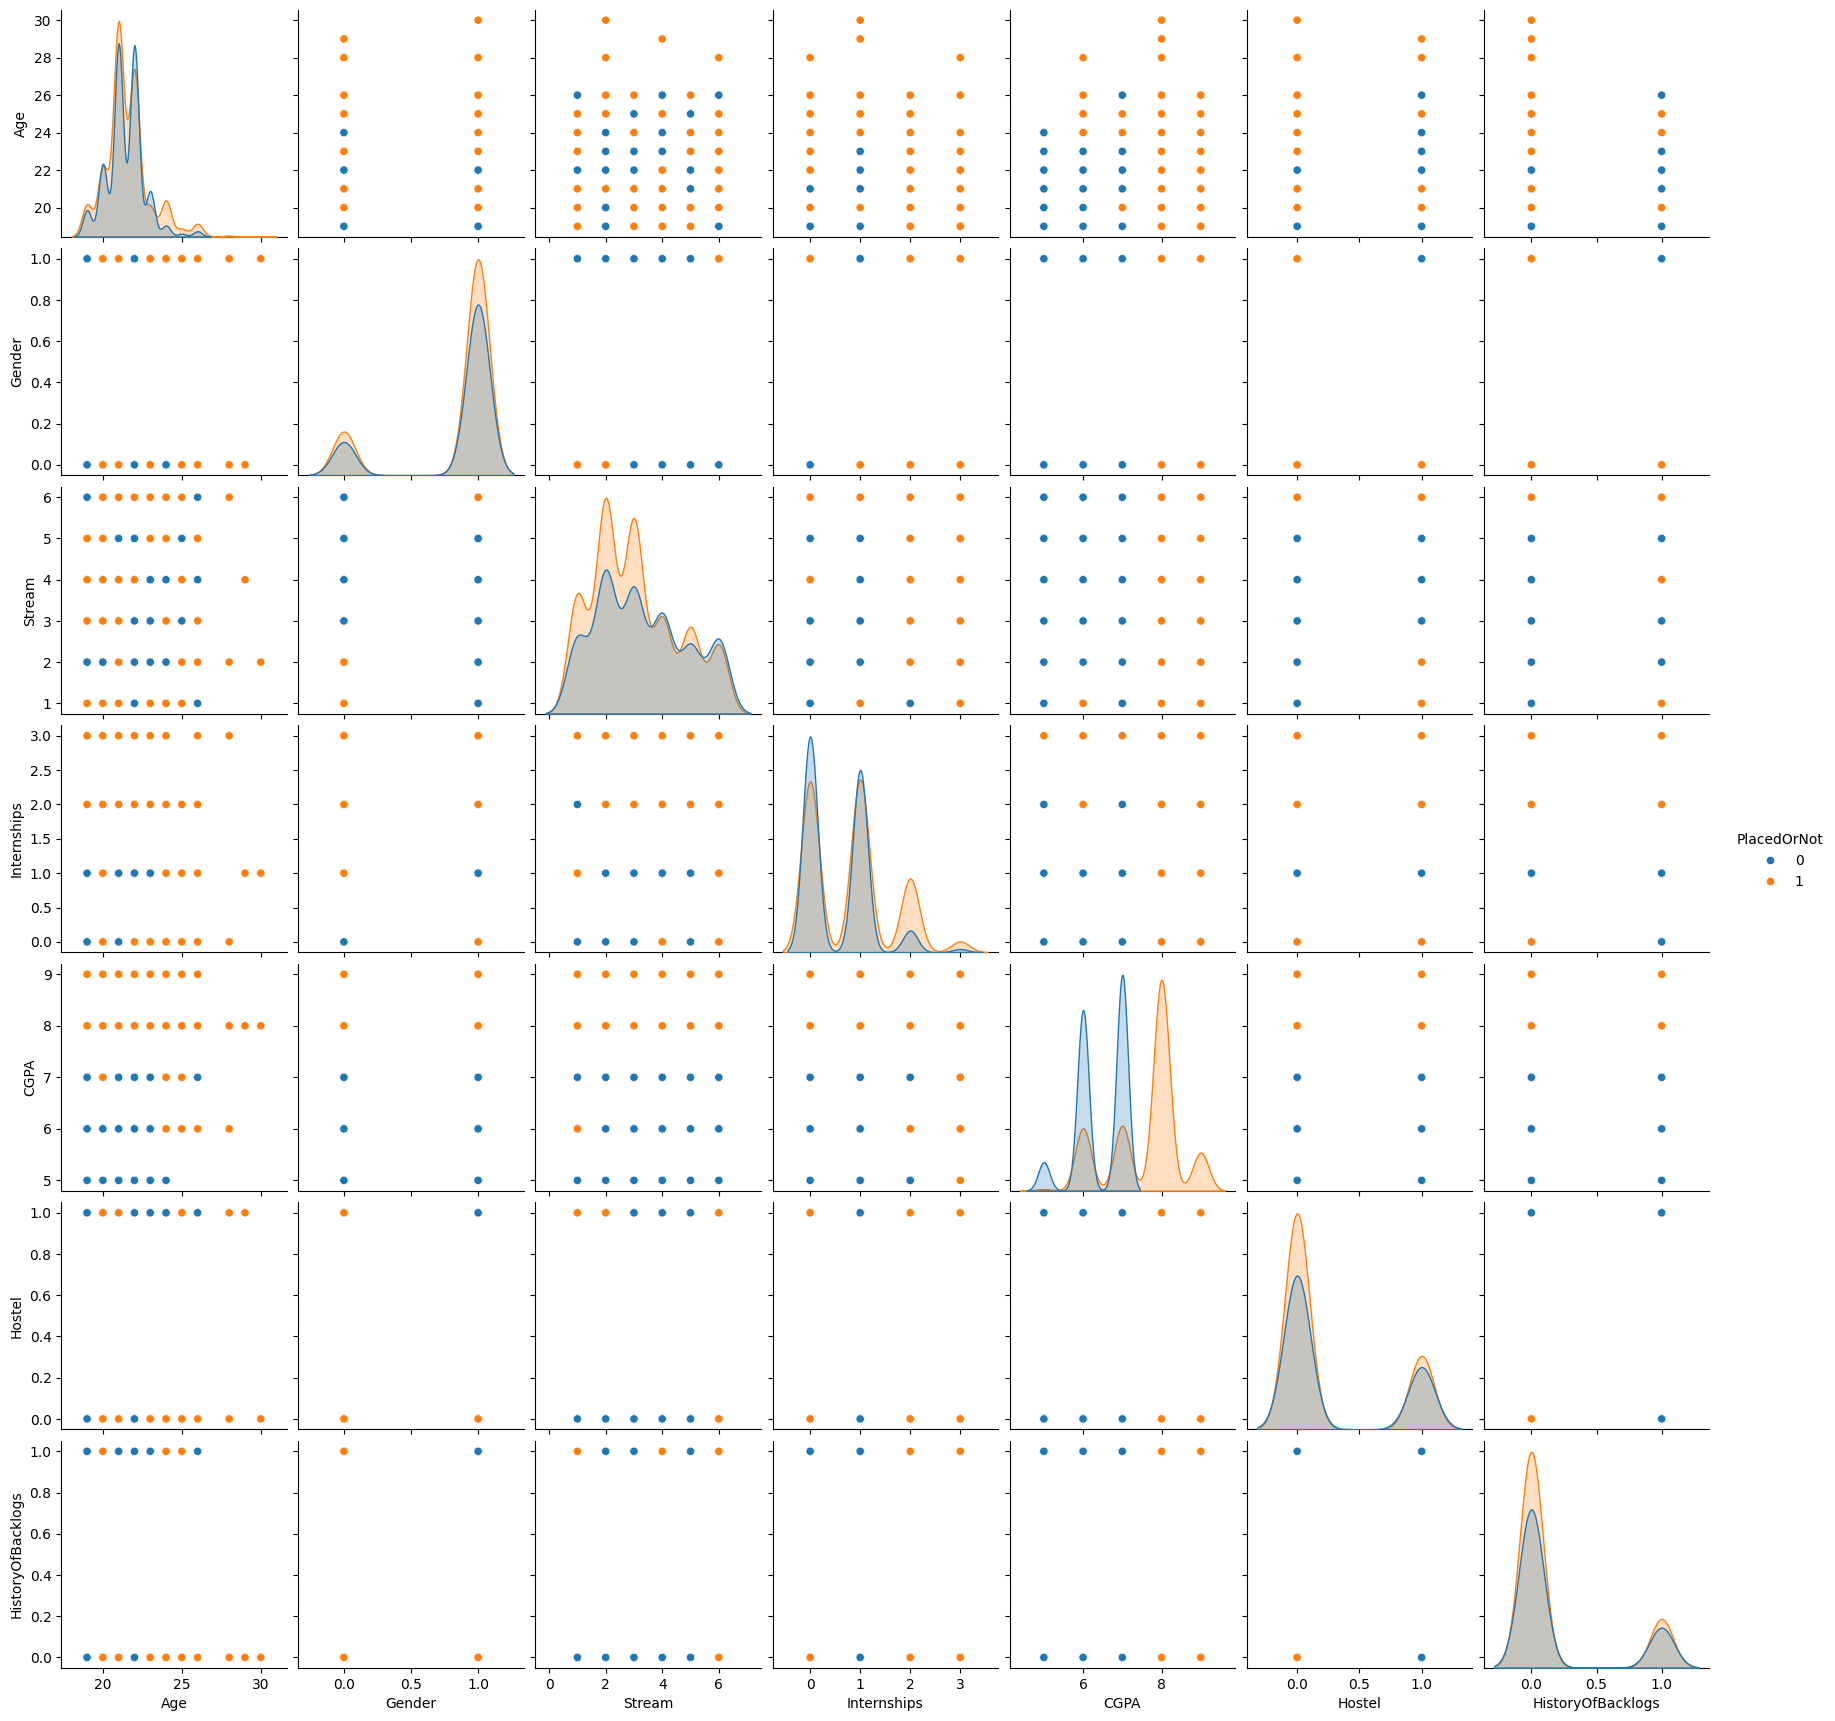

In [155]:
sns.pairplot(df,hue="PlacedOrNot")
plt.show()

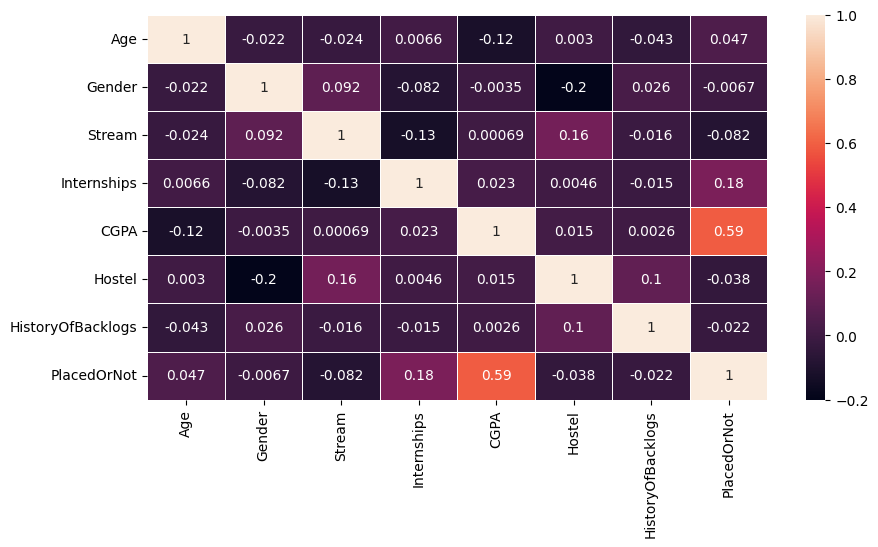

In [156]:
corr = df.corr()

plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True , linewidth = 0.5)
plt.show()

In [157]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [158]:
X = df.drop('PlacedOrNot', axis = 1)

In [159]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,1,3,0,7,0,0
2962,23,1,4,1,7,1,0
2963,22,1,3,1,7,0,0
2964,22,1,2,1,7,0,0


In [160]:
y = df['PlacedOrNot']

In [161]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [162]:
X.shape
y.shape

(2966,)

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [164]:
X_train.shape 

(1987, 7)

In [165]:
X_test.shape

(979, 7)

In [166]:
y_train.shape  

(1987,)

In [167]:
y_test.shape

(979,)

In [169]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svc = SVC()
svc.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [170]:
y_pred1 = lr.predict(X_test)
y_pred2 = svc.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

In [171]:
cm1 = confusion_matrix(y_test , y_pred1)
cm2 = confusion_matrix(y_test , y_pred2)
cm3 = confusion_matrix(y_test , y_pred3)
cm4 = confusion_matrix(y_test , y_pred4)
cm5 = confusion_matrix(y_test , y_pred5)
cm6 = confusion_matrix(y_test , y_pred6)

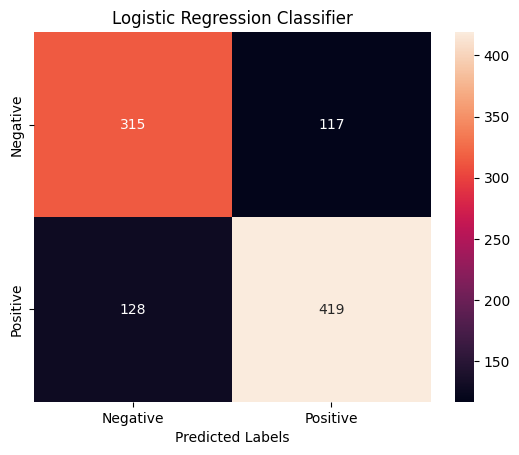

In [172]:
sns.heatmap(cm1 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Labels')
plt.title('Logistic Regression Classifier')
plt.show()

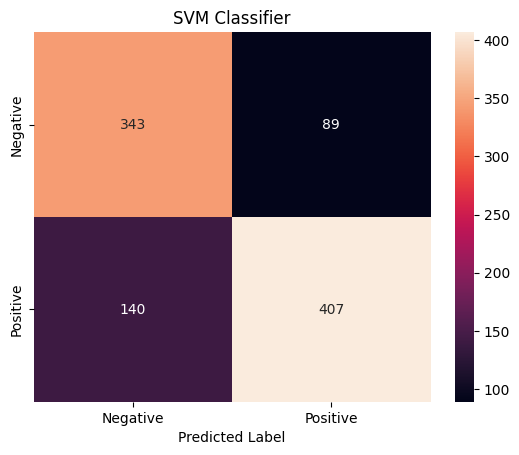

In [173]:
sns.heatmap(cm2 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('SVM Classifier')
plt.show()

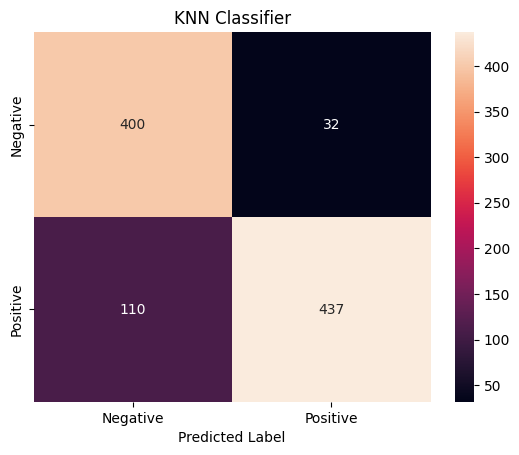

In [174]:
sns.heatmap(cm3 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('KNN Classifier')
plt.show()

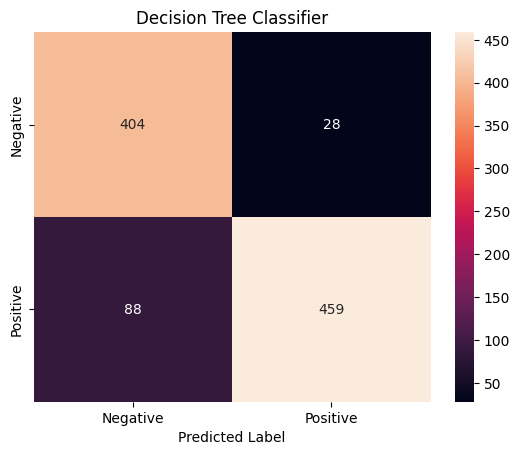

In [175]:
sns.heatmap(cm4 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Decision Tree Classifier')
plt.show()

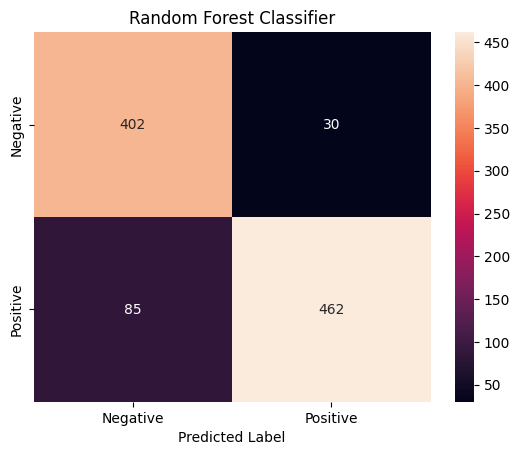

In [176]:
sns.heatmap(cm5 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Random Forest Classifier')
plt.show()

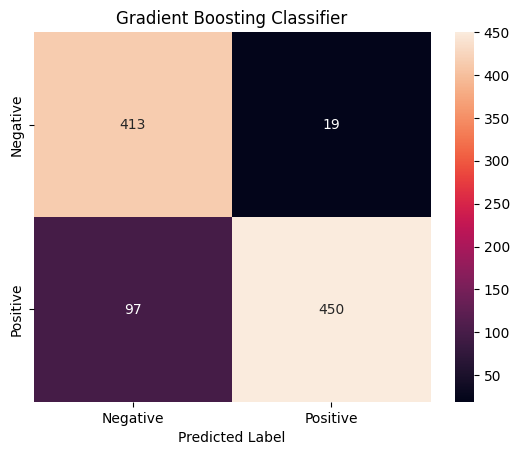

In [177]:
sns.heatmap(cm6 , annot = True, fmt = 'd' , xticklabels=["Negative","Positive"] , yticklabels=['Negative' , "Positive"])
plt.xlabel('Predicted Label')
plt.title('Gradient Boosting Classifier')
plt.show()

In [178]:
acc1 = accuracy_score(y_test,y_pred1)
acc2 = accuracy_score(y_test,y_pred2)
acc3 = accuracy_score(y_test,y_pred3)
acc4 = accuracy_score(y_test,y_pred4)
acc5 = accuracy_score(y_test,y_pred5)
acc6 = accuracy_score(y_test,y_pred6)

In [179]:
prec1 = precision_score(y_test,y_pred1)
prec2 = precision_score(y_test,y_pred2)
prec3 = precision_score(y_test,y_pred3)
prec4 = precision_score(y_test,y_pred4)
prec5 = precision_score(y_test,y_pred5)
prec6 = precision_score(y_test,y_pred6)

In [180]:
r1 = recall_score(y_test,y_pred1)
r2 = recall_score(y_test,y_pred2)
r3 = recall_score(y_test,y_pred3)
r4 = recall_score(y_test,y_pred4)
r5 = recall_score(y_test,y_pred5)
r6 = recall_score(y_test,y_pred6)

In [181]:
f1 = f1_score(y_test,y_pred1)
f2 = f1_score(y_test,y_pred2)
f3 = f1_score(y_test,y_pred3)
f4 = f1_score(y_test,y_pred4)
f5 = f1_score(y_test,y_pred5)
f6 = f1_score(y_test,y_pred6)

In [182]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACCURACY':[acc1*100,acc2*100,acc3*100,acc4*100,acc5*100,acc6*100],
            'PRECISION':[prec1*100,prec2*100,prec3*100,prec4*100,prec5*100,prec6*100],
            'RECALL' :[r1*100 , r2*100 , r3 * 100 , r4 * 100 , r5 * 100 , r6 * 100],
            'F1_SCORE':[f1*100 , f2*100 , f3 * 100 , f4 * 100 , f5 * 100 , f6 * 100]})

In [183]:
final_data

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
0,LR,74.974464,78.171642,76.599634,77.377655
1,SVC,76.608784,82.056452,74.405850,78.044104
2,KNN,85.495403,93.176972,79.890311,86.023622
3,DT,88.151175,94.250513,83.912249,88.781431
4,RF,88.253320,93.902439,84.460695,88.931665
5,GB,88.151175,95.948827,82.266910,88.582677


In [184]:
final_data[final_data['ACCURACY'] == final_data['ACCURACY'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
4,RF,88.25332,93.902439,84.460695,88.931665


In [185]:
final_data[final_data['PRECISION'] == final_data['PRECISION'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
5,GB,88.151175,95.948827,82.26691,88.582677


In [186]:
final_data[final_data['RECALL'] == final_data['RECALL'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
4,RF,88.25332,93.902439,84.460695,88.931665


In [187]:
final_data[final_data['F1_SCORE'] == final_data['F1_SCORE'].max()]

,Models,ACCURACY,PRECISION,RECALL,F1_SCORE
4,RF,88.25332,93.902439,84.460695,88.931665


<Axes: xlabel='Models', ylabel='ACCURACY'>

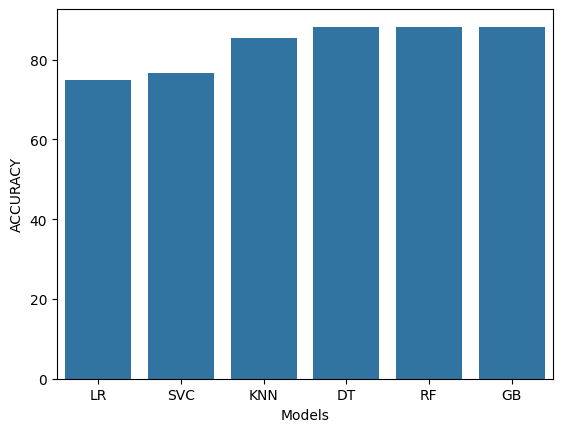

In [189]:
sns.barplot(x=final_data['Models'],y=final_data['ACCURACY'])

<Axes: xlabel='Models', ylabel='PRECISION'>

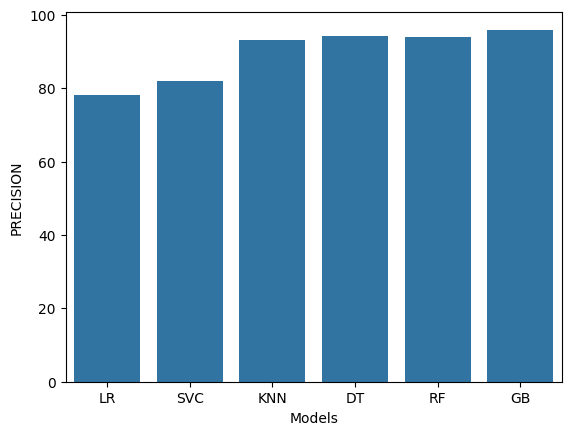

In [190]:
sns.barplot(x=final_data['Models'],y=final_data['PRECISION'])

<Axes: xlabel='Models', ylabel='RECALL'>

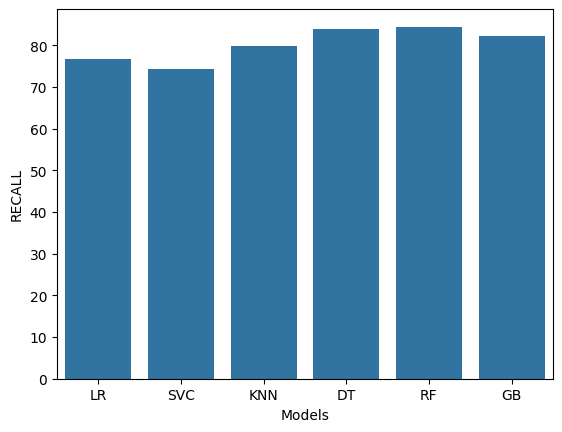

In [191]:
sns.barplot(x=final_data['Models'],y=final_data['RECALL'])

<Axes: xlabel='Models', ylabel='F1_SCORE'>

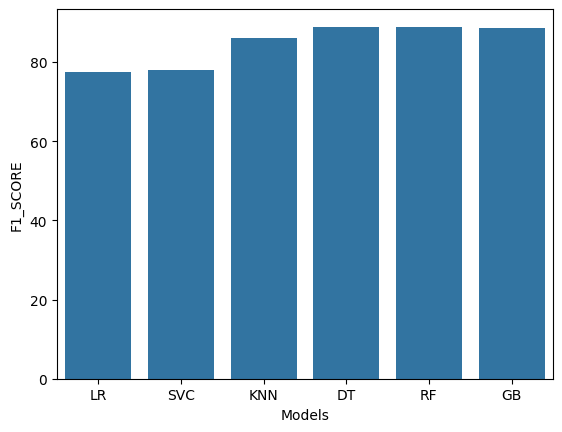

In [192]:
sns.barplot(x=final_data['Models'],y=final_data['F1_SCORE'])

In [193]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [194]:
new_data = pd.DataFrame({'Age' : 20,
                         'Gender' : 1,
                         'Stream' : 2,
                         'Internships' : 0,
                         'CGPA' : 9,
                         'Hostel' : 0,
                         'HistoryOfBacklogs' : 0},index = [0])
new_data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,20,1,2,0,9,0,0


In [195]:
p = rf.predict(new_data)
if p == 1:
    print('Placed')
else:
    print("Not-placed")

Placed


In [196]:
prob = rf.predict_proba(new_data)

prob

array([[0., 1.]])

In [197]:
print(f"You will be placed with probability of {prob[0][1]:.3f}")

You will be placed with probability of 1.000


In [198]:
pickle.dump(rf, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
model.predict(new_data)

array([1])

In [199]:
if(model.predict(new_data) == 1):
    print('Placed')
else:
    print('Not Placed')

Placed


In [201]:
new_data = pd.DataFrame({'Age' : 22,
                         'Gender' : 1,
                         'Stream' : 2,
                         'Internships' : 0,
                         'CGPA' : 7,
                         'Hostel' : 0,
                         'HistoryOfBacklogs' : 0},index = [0])
new_data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,2,0,7,0,0


In [202]:
if(model.predict(new_data) == 1):
    print('Placed')
else:
    print('Not Placed')

Not Placed


In [203]:
prob = rf.predict_proba(new_data)

prob

array([[0.81151698, 0.18848302]])